In [1]:
#Data Processing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [4]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [5]:
#Data filtration
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames
##as the both data is categorial data
X=pd.concat([X,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
#already convert in previous
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 0)

In [10]:
# Feature Scaling
##for w*x processs will be faster
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Implementing the ANN


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [12]:
# Initialising the ANN
classifier = Sequential()

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6,kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [14]:
# Adding the second hidden layer
classifier.add(Dense(units = 6,kernel_initializer= 'he_uniform',activation='relu'))

In [15]:
# Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling the ANN
#I have used adam optimiser as it is very much populer and most used optimiser
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [18]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size = 10,epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 1.0535 - accuracy: 0.4341 - val_loss: 0.5171 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 0s 930us/step - loss: 0.4983 - accuracy: 0.7980 - val_loss: 0.4719 - val_accuracy: 0.8012
Epoch 3/100
536/536 [==============================] - 0s 910us/step - loss: 0.4481 - accuracy: 0.8079 - val_loss: 0.4440 - val_accuracy: 0.8122
Epoch 4/100
536/536 [==============================] - 0s 919us/step - loss: 0.4135 - accuracy: 0.8265 - val_loss: 0.4240 - val_accuracy: 0.8167
Epoch 5/100
536/536 [==============================] - 0s 930us/step - loss: 0.4116 - accuracy: 0.8244 - val_loss: 0.4080 - val_accuracy: 0.8281
Epoch 6/100
536/536 [==============================] - 1s 944us/step - loss: 0.3798 - accuracy: 0.8458 - val_loss: 0.3945 - val_accuracy: 0.8368
Epoch 7/100
536/536 [==============================] - 0s 926us/step - loss: 0.3722 - accuracy: 0.8474 - val_loss: 0.3852 - val_accu

536/536 [==============================] - 1s 939us/step - loss: 0.3286 - accuracy: 0.8606 - val_loss: 0.3578 - val_accuracy: 0.8516
Epoch 58/100
536/536 [==============================] - 1s 936us/step - loss: 0.3384 - accuracy: 0.8620 - val_loss: 0.3585 - val_accuracy: 0.8497
Epoch 59/100
536/536 [==============================] - 0s 919us/step - loss: 0.3222 - accuracy: 0.8641 - val_loss: 0.3571 - val_accuracy: 0.8497
Epoch 60/100
536/536 [==============================] - 1s 962us/step - loss: 0.3209 - accuracy: 0.8676 - val_loss: 0.3576 - val_accuracy: 0.8527
Epoch 61/100
536/536 [==============================] - 1s 966us/step - loss: 0.3188 - accuracy: 0.8679 - val_loss: 0.3584 - val_accuracy: 0.8497
Epoch 62/100
536/536 [==============================] - 0s 920us/step - loss: 0.3307 - accuracy: 0.8612 - val_loss: 0.3569 - val_accuracy: 0.8546
Epoch 63/100
536/536 [==============================] - 1s 958us/step - loss: 0.3469 - accuracy: 0.8571 - val_loss: 0.3571 - val_accuracy

In [19]:
#checking all data
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


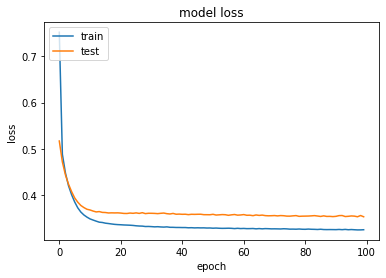

In [21]:
#data visualize
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [26]:
#Represting this with confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,y_pred)
CM

array([[1504,   91],
       [ 193,  212]], dtype=int64)

In [24]:
#Calculating the acc
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [25]:
score

0.858